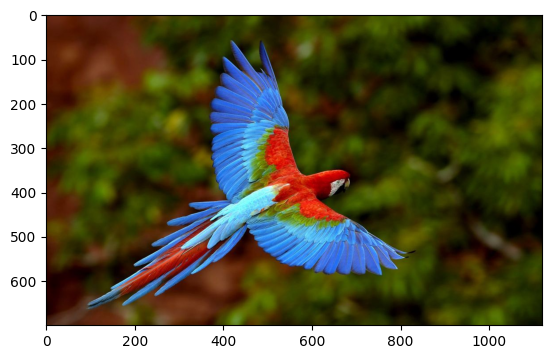

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = 'bird.jpeg'
img = plt.imread(IMG_PATH)
plt.imshow(img)

In [3]:
img.shape

(700, 1120, 3)

In [4]:
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

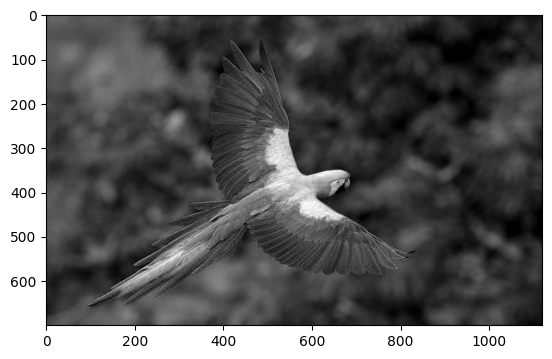

In [5]:
plt.imshow(red_channel, cmap='gray')

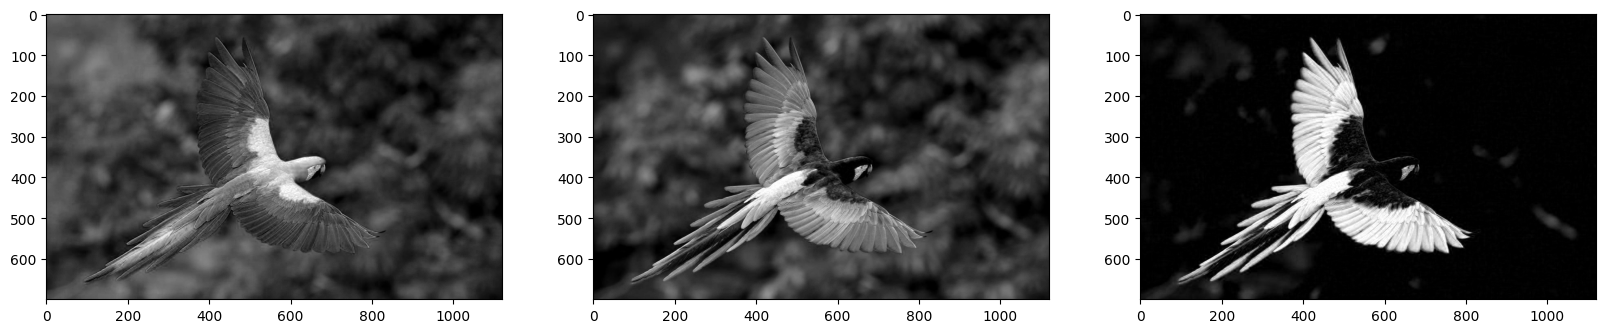

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 30))
ax1.imshow(red_channel, cmap='gray')
ax2.imshow(green_channel, cmap='gray')
ax3.imshow(blue_channel, cmap='gray')

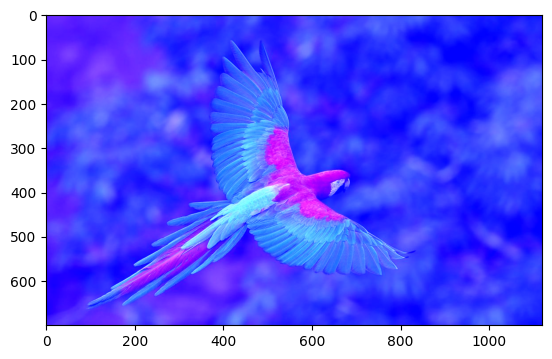

In [8]:
img2 = img.copy()
img2[:, :, 2] = 255
plt.imshow(img2)

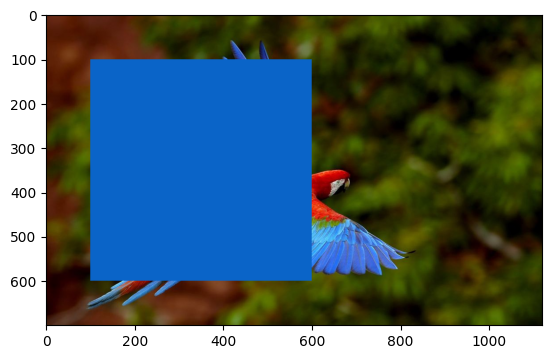

In [9]:
img3 = img.copy()
img3[100:600, 100:600, 0] = 10
img3[100:600, 100:600, 1] = 100
img3[100:600, 100:600, 2] = 200
plt.imshow(img3)

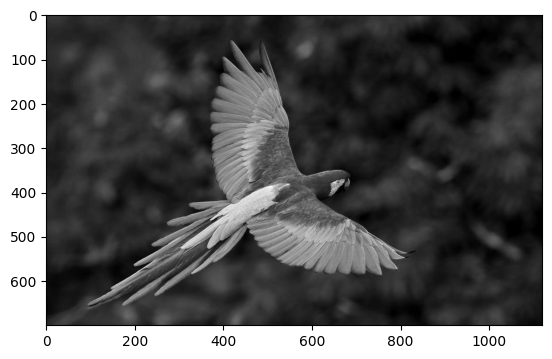

In [11]:
img4 = 0.33 * red_channel + 0.33 * green_channel + 0.33 * blue_channel
plt.imshow(img4, cmap='gray')

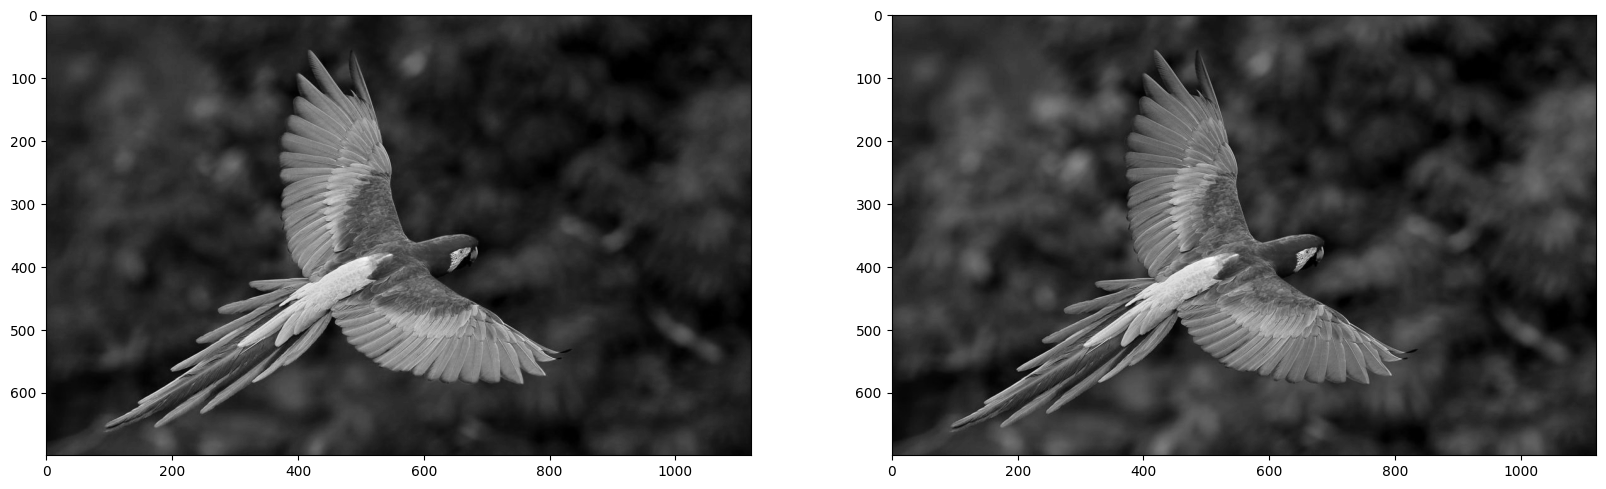

In [12]:
# pip install opencv-python
import cv2

img5 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 30))
ax1.imshow(img4, cmap='gray')
ax2.imshow(img5, cmap='gray')

# blurring

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

IMG_PATH = 'bird.jpg'
img = plt.imread(IMG_PATH)

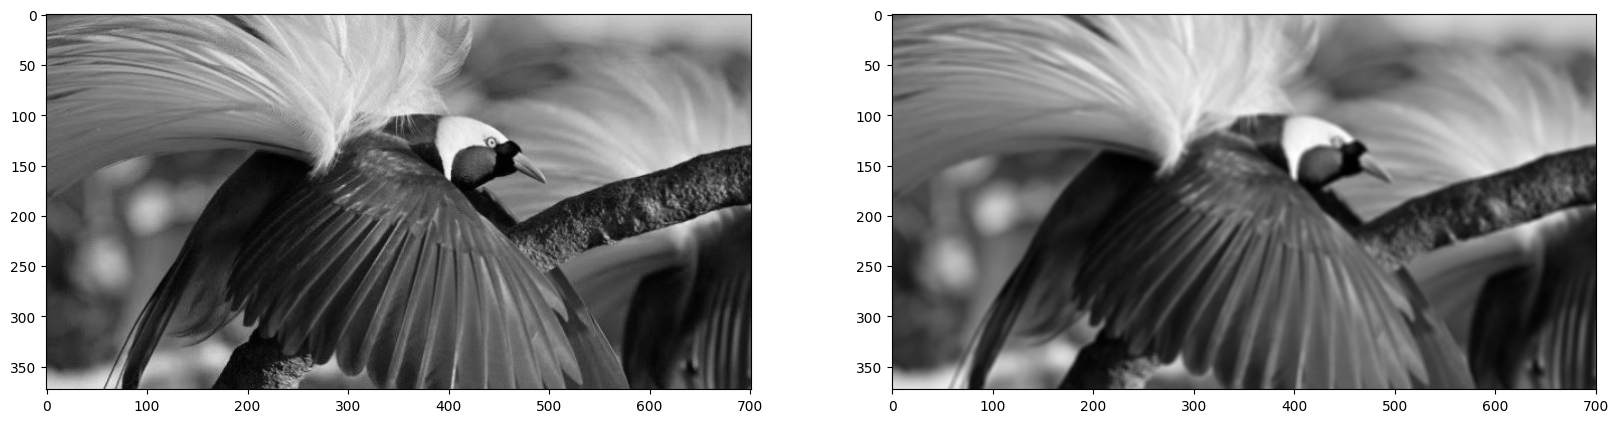

In [119]:
img_gray = cv2.cvtColor(img[:, :, :3], cv2.COLOR_RGB2GRAY)
kernel_width = 5
kernel_height = 5
smoothing_kernel = np.ones((kernel_width, kernel_height)) / (kernel_width * kernel_height)
img_blurred = signal.convolve2d(img_gray, smoothing_kernel, boundary='symm', mode='same')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 30))
ax1.imshow(img_gray, cmap='gray')
ax2.imshow(img_blurred, cmap='gray')

# edge detection

In [120]:
x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
y_kernel = x_kernel.T.copy()
fx = signal.convolve2d(img_gray, x_kernel, boundary='symm', mode='same')
fy = signal.convolve2d(img_gray, y_kernel, boundary='symm', mode='same')

print(f'{fx.shape=}')
print(f'{fy.shape=}')
print(f'{img_gray.shape=}')

fx.shape=(373, 701)
fy.shape=(373, 701)
img_gray.shape=(373, 701)


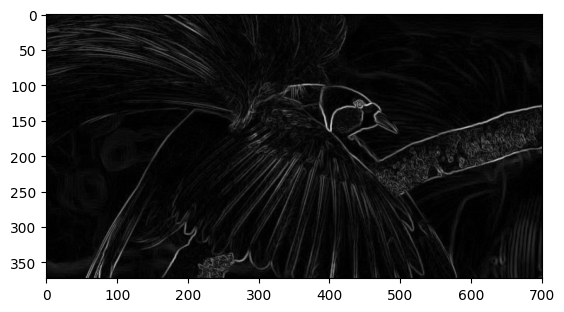

In [121]:
gradient_magnitude = (fx ** 2 + fy ** 2) ** 0.5 # **0.5 is sqrt()
plt.imshow(gradient_magnitude, cmap='gray')

In [122]:
# threshold = gradient_magnitude.max() - 2 * gradient_magnitude.std()
threshold = 3
print(f'{threshold=}')

threshold=3


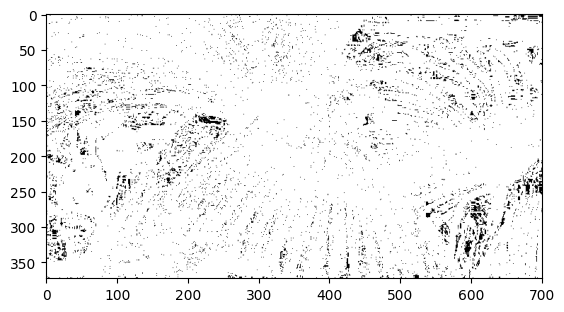

In [123]:
img_edge = gradient_magnitude > threshold
# img_edge = gradient_magnitude > 5
plt.imshow(img_edge, cmap='gray')

# sharpening

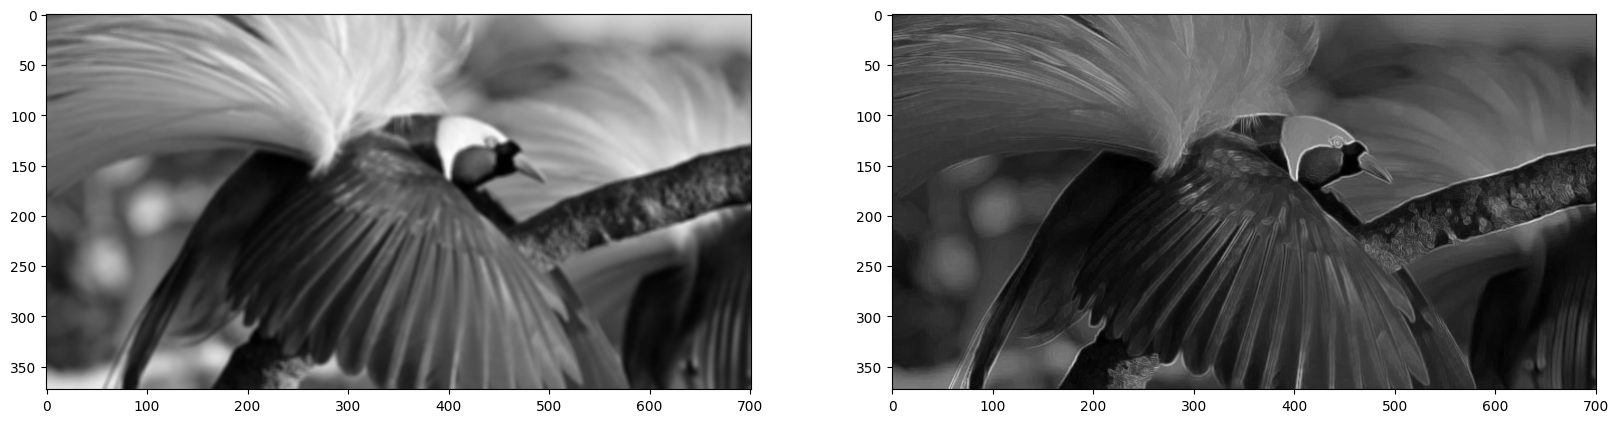

In [124]:
img_sharped = img_blurred + 0.5 * gradient_magnitude
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 30))
ax1.imshow(img_blurred, cmap='gray')
ax2.imshow(img_sharped, cmap='gray')

In [3]:
import numpy as np
def convolution_2d(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    new_height = image_height + kernel_height - 1
    new_width = image_width + kernel_width - 1
    new_image = np.zeros((new_height, new_width))

    for i in range(new_height):
        for j in range(new_width):
            for k in range(kernel_height):
                for l in range(kernel_width):
                    if i - k >= 0 and i - k < image_height and j - l >= 0 and j - l < image_width:
                        new_image[i, j] = new_image[i, j] + image[i - k, j - l] * kernel[k, l]
    return new_image

sample_image = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
sample_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
final_image = convolution_2d(sample_image, sample_kernel)
print(final_image)

[[ -1.  -4.  -8.  -8.  -3.]
 [ -4. -13. -20. -17.  -6.]
 [ -6. -18. -24. -18.  -6.]
 [  4.  13.  20.  17.   6.]
 [  7.  22.  32.  26.   9.]]


In [2]:
def hello_decorator(func):
    def convolution_2d(*args, **kwargs):
        import numpy as np
        image, kernel = args[0], args[1]
        print("before Execution")
        
        if image.ndim == 3 and kernel.ndim == 2:
            # getting the returned value
            returned_value = func(*args, **kwargs)
        else:
            print('image must have exact 3 color channels and kernel must have exact 2 dimensions')
		# returning the value to the original frame
        return returned_value
    return convolution_2d


# adding decorator to the function
@hello_decorator
def sum_two_numbers(a, b):
	print("Inside the function")
	return a + b

a, b = 1, 2

# getting the value through return of the function
print("Sum =", sum_two_numbers(a, b))


before Execution
Inside the function
after Execution
Sum = 3


# Shift scaling and Rotation variance

In [6]:
import cv2
import matplotlib.pyplot as plt

In [40]:
IMG_PATH = 'thumbdrives.png'
img_1 = cv2.imread(IMG_PATH)
img_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
threshold = cv2.threshold(img_blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
counts = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

counts = counts[0] if len(counts) == 2 else counts[1]
for c in counts:
    area = cv2.contourArea(c)
    if area > 10000:
        # cv2.drawContours(threshold, [c], -1, (0,0,0), -1)
        cv2.drawContours(threshold, [c], -1, (36,255,12), 3)

cv2.imwrite('thumbdrives_threshold.jpg', threshold)
cv2.imwrite('img_1.jpg', img_1)

True

Text(0.5, 1.0, 'Threshold')

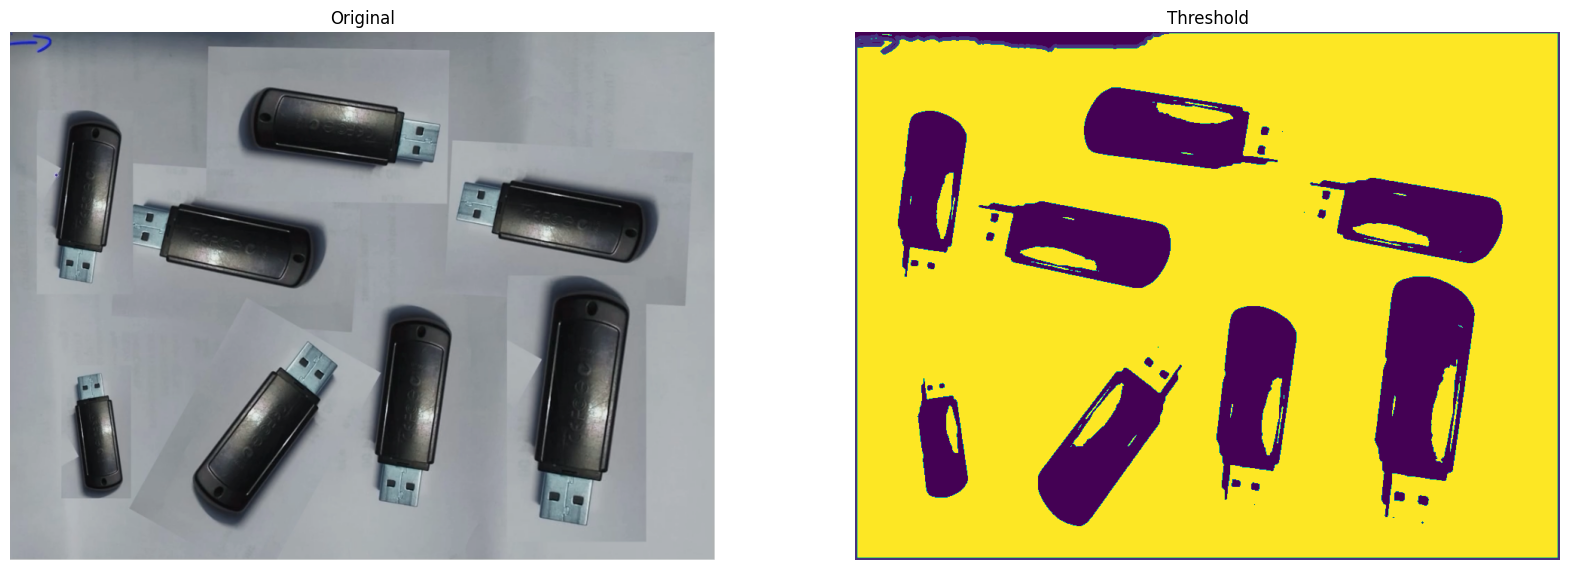

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 30), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img_1)
ax1.set_title('Original')
ax2.axis('off')
ax2.imshow(threshold)
ax2.set_title('Threshold')

Text(0.5, 1.0, 'Objects detected')

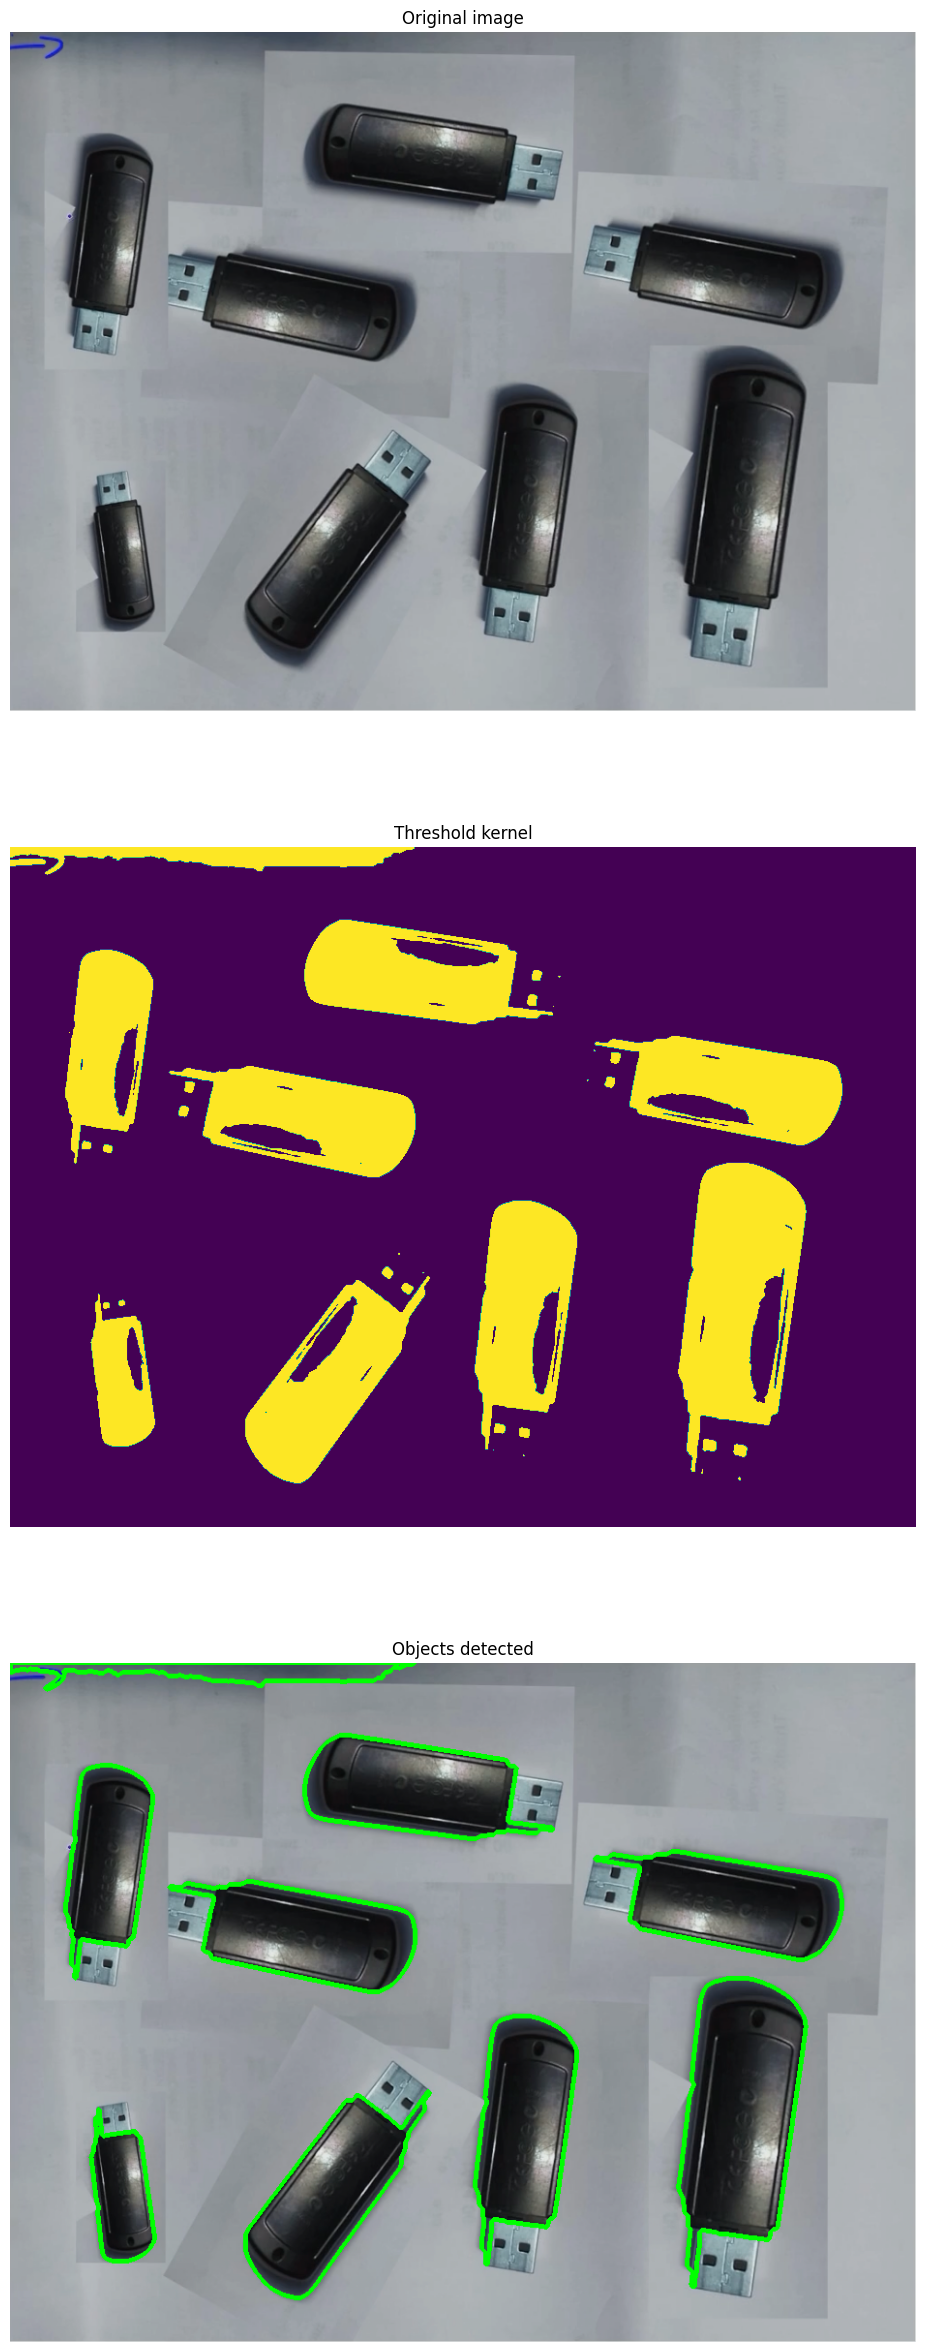

In [55]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('thumbdrives.png')
img_contour = cv2.imread('thumbdrives.png')

img_gray = cv2.cvtColor(img_contour, cv2.COLOR_RGB2GRAY)
img_blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
img_threshold = cv2.threshold(img_blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
counts = cv2.findContours(img_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

minimum_object_area = 1000
counts = counts[0] if len(counts) == 2 else counts[1]
for c in counts:
    area = cv2.contourArea(c)
    if area > minimum_object_area:
        cv2.drawContours(img_contour, [c], -1, (0,255,0), 3)

cv2.imwrite('out_threshold.jpg', img_threshold)
cv2.imwrite('out_contour.jpg', img_contour)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 30), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image);
ax1.set_title('Original image')
ax2.axis('off')
ax2.imshow(img_threshold);
ax2.set_title('Threshold kernel')
ax3.axis('off')
ax3.imshow(img_contour);
ax3.set_title('Objects detected')

In [3]:
def verify_numbers(func):
    def wrapper(*args, **kwargs):
        if args[0] > 0 and args[1] > 0:
            return func(*args, **kwargs)
        else:
            print('Numbers must be greater than 0')
    return wrapper

@verify_numbers
def sum_two_numbers(a, b):
    return a + b

print(sum_two_numbers(10, 20))
print(sum_two_numbers(0, 20))

30
Numbers must be greater than 0
None


/var/folders/ry/rm14stxj66n9l_hyf7tdmwlh0000gn/T/ipykernel_12383/552405164.py:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd_1, hog_image_1 = hog(img, orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, channel_axis=2, multichannel=True)
/var/folders/ry/rm14stxj66n9l_hyf7tdmwlh0000gn/T/ipykernel_12383/552405164.py:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd_2, hog_image_2 = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=2, multichannel=True)


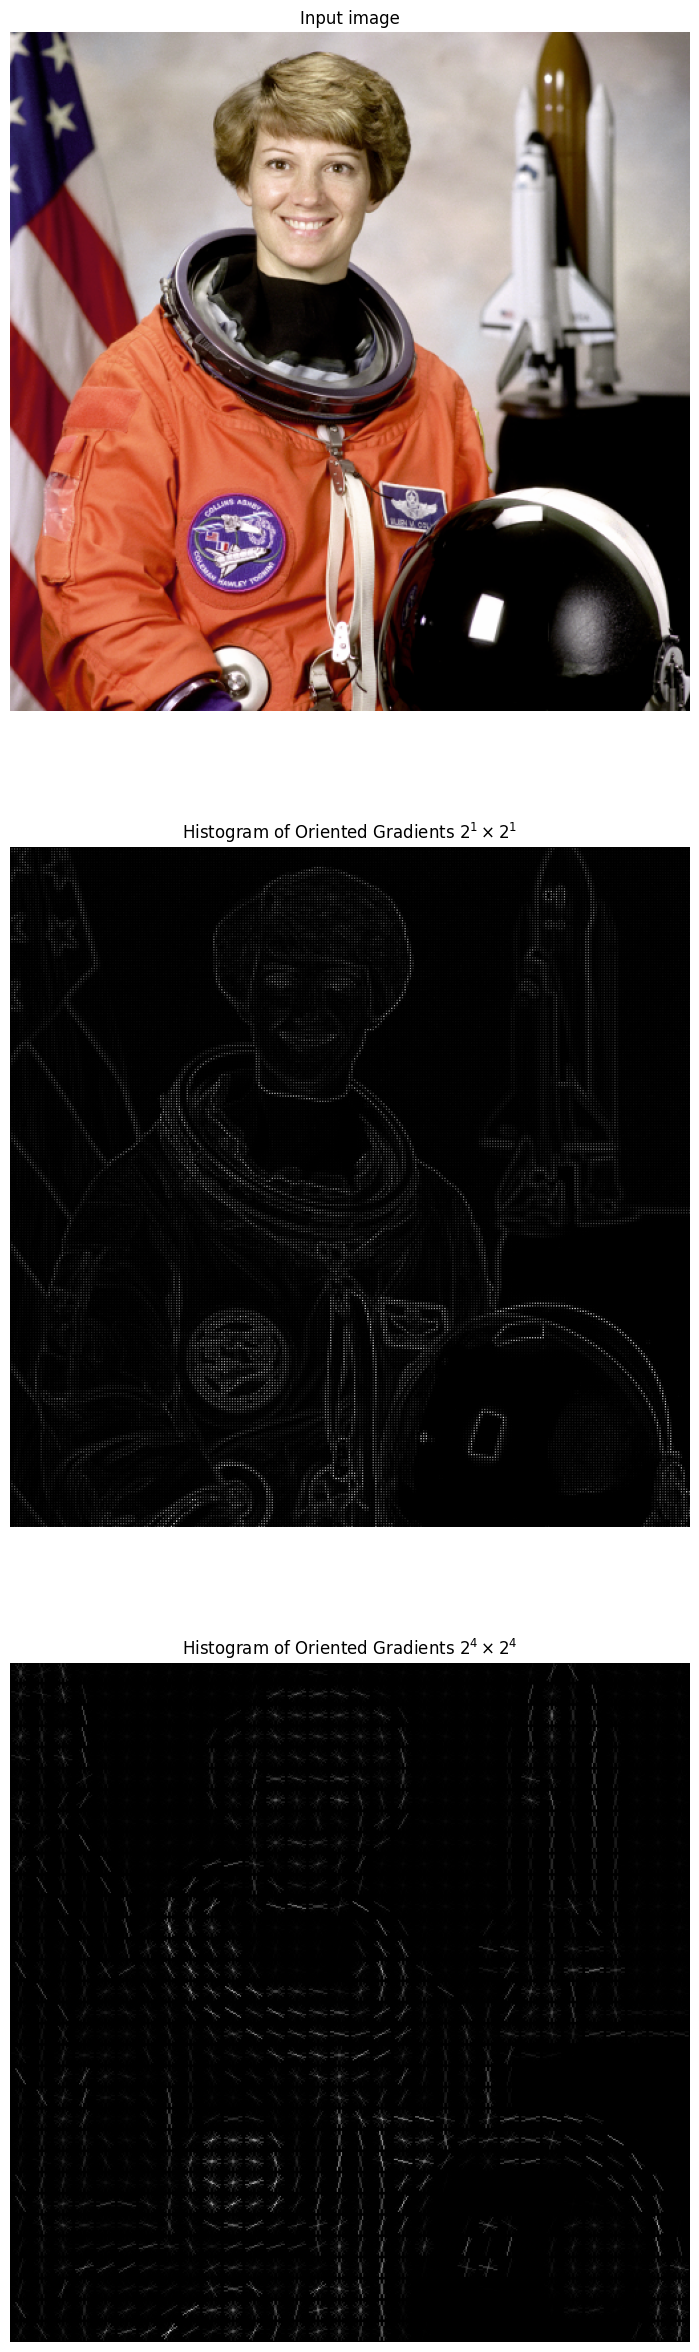

In [52]:
#!pip install scikit-image
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

img = data.astronaut()
fd_1, hog_image_1 = hog(img, orientations=8, pixels_per_cell=(2, 2), cells_per_block=(1, 1), visualize=True, channel_axis=2, multichannel=True)
fd_2, hog_image_2 = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=2, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 30), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img, cmap='gray');
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image_1, in_range='image', out_range='dtype')
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap='gray');
ax2.set_title(r'Histogram of Oriented Gradients $2^1 \times 2^1$')

hog_image_rescaled = exposure.rescale_intensity(hog_image_2, in_range='image', out_range='dtype')
ax3.axis('off')
ax3.imshow(hog_image_rescaled, cmap='gray');
ax3.set_title(r'Histogram of Oriented Gradients $2^4 \times 2^4$')
plt.show();